<a href="https://colab.research.google.com/github/ayuko66/akiya-lens/blob/main/notebook/akiya_lens_%E8%B2%A1%E5%8B%99%E6%83%85%E5%A0%B1%E9%99%A4%E3%81%8F_5%E5%B9%B4%E5%A4%89%E5%8C%96%E7%8E%87_%E4%B8%AD%E5%BF%83%E5%BA%A7%E6%A8%99%E8%BF%BD%E5%8A%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install japanize_matplotlib
import japanize_matplotlib as jmp

In [70]:
!pip install catboost
!pip install shap

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
import shap

# データ読み込み
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_projects/akiya-lens/processed/features_master__wide__v1.csv")
df.head(10)

,市区町村コード,市区町村名,都道府県名,2018_15〜64歳人口,2018_15歳未満人口,2018_65歳以上人口,2018_出生数,2018_出生率[‰],2018_年少人口率[%],2018_死亡数,...,2023_転入者数,2023_転出者数,2023_高齢化率[%],2023_年少人口率[%],2023_生産年齢人口率[%],2023_出生率[‰],2023_死亡率[‰],2023_転入率[‰],2023_転出率[‰],2023_転入超過率[‰]
0,2201,青森市,青森県,170236,32574,84764,1752.0,6.092345,11.327171,3664.0,...,6468.0,7657.0,31.965583,10.527483,57.506934,4.645600,15.358107,23.511536,27.833616,-4.322080
1,2202,弘前市,青森県,101677,18977,53396,1110.0,6.377478,10.903189,2317.0,...,4141.0,4801.0,32.762569,10.479911,56.757520,4.964390,16.473841,24.888061,28.854765,-3.966704
2,2203,八戸市,青森県,137564,27841,66956,1600.0,6.885837,11.981787,2801.0,...,5722.0,6886.0,31.398086,11.280289,57.321625,5.142458,14.984291,25.609352,30.818944,-5.209592
3,2204,黒石市,青森県,19944,3550,10551,205.0,6.021442,10.427376,492.0,...,696.0,865.0,34.211102,9.779515,56.009382,4.409695,17.326036,21.767005,27.052385,-5.285379
4,2205,五所川原市,青森県,31905,5621,18215,282.0,5.059113,10.084139,828.0,...,1227.0,1487.0,35.840708,9.246262,54.913030,3.757247,18.538297,23.401739,28.360543,-4.958804
5,2206,十和田市,青森県,35623,7086,19587,382.0,6.132015,11.374727,826.0,...,1597.0,1651.0,34.349546,10.645929,55.004525,4.692790,15.854926,26.765662,27.670700,-0.905038
6,2207,三沢市,青森県,24763,5549,9915,340.0,8.452035,13.794218,440.0,...,1836.0,1850.0,26.904811,12.763267,60.331922,6.271939,14.428040,47.387983,47.749329,-0.361346
7,2208,むつ市,青森県,34041,6608,18255,349.0,5.924895,11.218253,816.0,...,1718.0,2138.0,34.036786,10.186112,55.777103,4.111558,17.501410,31.255117,38.896065,-7.640948
8,2209,つがる市,青森県,18118,3303,11833,149.0,4.480664,9.932640,571.0,...,569.0,776.0,38.866686,9.185431,51.947883,3.476622,20.014946,18.487832,25.213634,-6.725802
9,2210,平川市,青森県,17866,3496,10286,160.0,5.046045,11.025609,455.0,...,563.0,634.0,34.577938,10.817899,54.299295,5.015571,16.882478,18.455991,20.783478,-2.327487


In [73]:
pd.set_option('display.max_rows', None)
cols = df.columns.to_list()
for col in cols:
  print(f"{col}")

市区町村コード
市区町村名
都道府県名
2018_15〜64歳人口
2018_15歳未満人口
2018_65歳以上人口
2018_出生数
2018_出生率[‰]
2018_年少人口率[%]
2018_死亡数
2018_死亡率[‰]
2018_生産年齢人口率[%]
2018_総人口
2018_転入率[‰]
2018_転入者数
2018_転入超過率[‰]
2018_転出率[‰]
2018_転出者数
2018_高齢化率[%]
スーパー件数
スーパー密度[件/km²]
2018年総人口あたりのスーパー密度
2023年総人口あたりのスーパー密度
住宅地価_log中央値_2018
住宅地価_log中央値_2023
住宅地価_log差分
住宅地価_中央値_2018
住宅地価_中央値_2023
住宅地価_増減率[%]
学校件数
学校密度[件/km²]
2018年総人口あたりの学校密度
2023年総人口あたりの学校密度
平均気温
年最深積雪
年降水量
最低気温
最高気温
centroid_lat
centroid_lon
centroid_lat_std
centroid_lon_std
標準地点数_2018
標準地点数_2023
病院件数
病院密度[件/km²]
2018年総人口あたりの病院密度
2023年総人口あたりの病院密度
空き家_2018
空き家_2023
空き家_増加率_5年_%
空き家率_2018
空き家率_2023
空き家率_差分_5年_pt
住宅総数_2018
住宅総数_2023
過疎地域市町村
都市種別
都道府県コード
駅件数
駅密度[件/km²]
2018年総人口あたりの駅密度
2023年総人口あたりの駅密度
住民基本台帳登載人口_2018
住民基本台帳登載人口_2023
地方税_2018
地方税_2023
地方税_変化量
地方税_変化率
地方税_ログ差分
地方交付税_2018
地方交付税_2023
地方交付税_変化量
地方交付税_変化率
地方交付税_ログ差分
民生費_2018
民生費_2023
民生費_変化量
民生費_変化率
民生費_ログ差分
教育費_2018
教育費_2023
教育費_変化量
教育費_変化率
教育費_ログ差分
土木費_2018
土木費_2023
土木費_変化量
土木費_変化率
土木費_ログ差分
人件費_2018
人件費_2023
人件費_変化

In [74]:
df["住宅地価_log中央値_変化量"] = df["住宅地価_log中央値_2023"] - df["住宅地価_log中央値_2018"]


df["Δ出生率"] = df["2023_出生率[‰]"] - df["2018_出生率[‰]"]
df["Δ死亡率"] = df["2023_死亡率[‰]"] - df["2018_死亡率[‰]"]
df["Δ年少人口率"] = df["2023_年少人口率[%]"] - df["2018_年少人口率[%]"]
df["Δ高齢化率"] = df["2023_高齢化率[%]"] - df["2018_高齢化率[%]"]
df["Δ生産年齢人口率"] = df["2023_生産年齢人口率[%]"] - df["2018_生産年齢人口率[%]"]
df["Δ転入超過率"] = df["2023_転入超過率[‰]"] - df["2018_転入超過率[‰]"]



# display(df.head())

In [75]:
df_feature_diff = df.copy()
df_feature_diff.set_index('市区町村コード')
df_feature_diff = df_feature_diff[['空き家率_2018', '空き家率_2023',
                         '2018_出生率[‰]', '2018_年少人口率[%]',	'2018_死亡率[‰]', '2018_生産年齢人口率[%]', '2018_転入超過率[‰]', '2018_高齢化率[%]',
                         'Δ出生率', 'Δ年少人口率',	'Δ死亡率', 'Δ生産年齢人口率', 'Δ転入超過率', 'Δ高齢化率',
                         '2018年総人口あたりのスーパー密度', '2018年総人口あたりの学校密度', '2018年総人口あたりの病院密度',
                         '2018年総人口あたりの駅密度',
                         '住宅地価_log中央値_2018', '住宅地価_log中央値_変化量', '平均気温', '年最深積雪', '年降水量', '最低気温', '過疎地域市町村', 'centroid_lat_std', 'centroid_lon_std']]

df_feature_diff = pd.get_dummies(df_feature_diff, columns=['過疎地域市町村'])

### 特徴量から空き家率_2018は除く

In [76]:
# 2023年は特徴量から除く
X_full_diff = df_feature_diff.drop(['空き家率_2018', '空き家率_2023'], axis=1)
y_full_diff = df_feature_diff['空き家率_2023']

params_full_diff = dict(
    iterations=1000,          # 学習イテレーション数
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",     # 最適化はRMSE
    eval_metric="R2",         # 主表示をR²にする
    custom_metric=["RMSE"],   # RMSEもログに出す
    random_seed=42,
    verbose=False
)
params_full_diff['eval_metric'] = 'RMSE' # Use RMSE as the primary evaluation metric for this model
params_full_diff['custom_metric'] = ['RMSE', 'R2'] # Add R2 to custom_metric


# Perform cross-validation
cv_full_diff = cv(
    Pool(X_full_diff, y_full_diff),   # Features and target
    params_full_diff,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    verbose=False # Suppress verbose output during CV
)

# Extract and print the mean RMSE and R2 from the cross-validation results
rmse_full_cv_diff = cv_full_diff["test-RMSE-mean"].iloc[-1]
r2_full_cv_diff = cv_full_diff["test-R2-mean"].iloc[-1]

print(f"Full Model Cross-Validation RMSE (5-fold mean): {rmse_full_cv_diff:.3f}")
print(f"Full Model Cross-Validation R² (5-fold mean): {r2_full_cv_diff:.3f}")

Training on fold [0/5]

bestTest = 4.524780195
bestIteration = 334

Training on fold [1/5]

bestTest = 7.49509181
bestIteration = 968

Training on fold [2/5]

bestTest = 4.2799063
bestIteration = 775

Training on fold [3/5]

bestTest = 3.678108085
bestIteration = 392

Training on fold [4/5]

bestTest = 5.71913335
bestIteration = 330

Full Model Cross-Validation RMSE (5-fold mean): 5.164
Full Model Cross-Validation R² (5-fold mean): 0.390


In [77]:
# cvで出したパラメータを使ってモデルを作成
final_diff_model = CatBoostRegressor(**params_full_diff)
final_diff_model.fit(X_full_diff, y_full_diff, verbose=False)

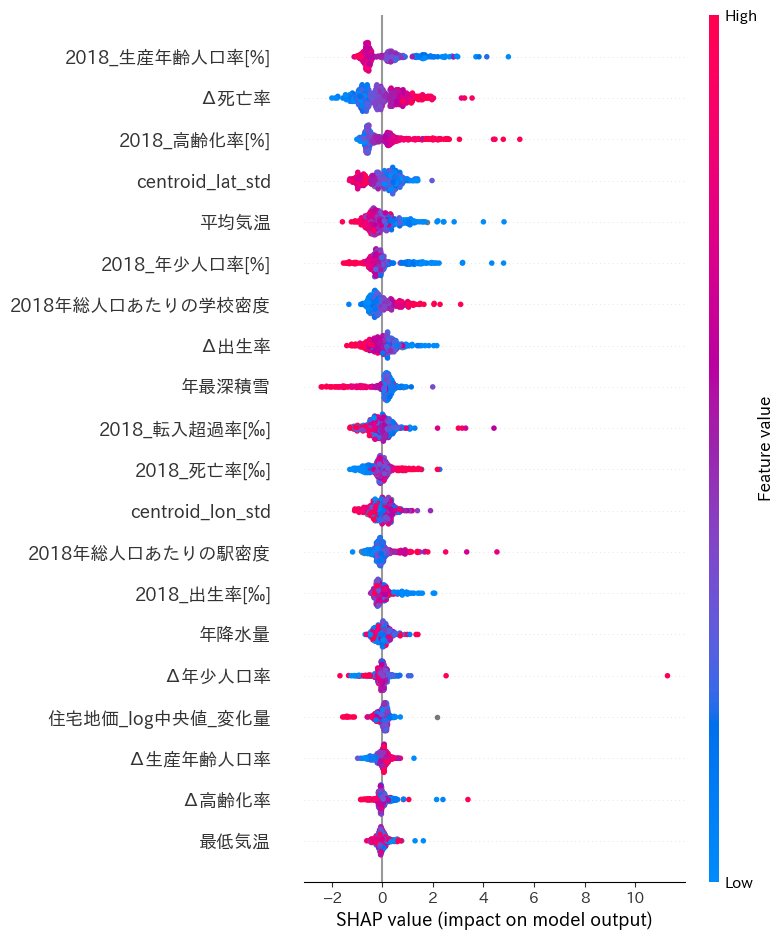

In [78]:
# SHAP値の計算 (フルモデル)
# SHAP explainer for the full model
explainer_full_diff = shap.Explainer(final_diff_model)

# SHAP values for the full model predictions
shap_values_full_diff = explainer_full_diff(X_full_diff)

# 可視化 (特徴重要度)
shap.summary_plot(shap_values_full_diff, X_full_diff)

k=5 交差検証

```
Full Model Cross-Validation RMSE (5-fold mean): 5.164
Full Model Cross-Validation R² (5-fold mean): 0.390
```

In [79]:
final_diff_model.save_model("final_diff_model.cbm")